In [11]:
import sys
sys.path.append('../')
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2
from taunet.simulation import * 
from taunet.database import *
from taunet.cnn import TauNet

TauNet: Running on perlmutter


/global/u2/l/lonappan/workspace/taunet/Notebooks/../taunet/config.py:9: UserWarning: FFP8 not available on NERSC
  warnings.warn('FFP8 not available on NERSC')


In [3]:
import os

In [4]:
spectradb = SpectrumDB()
mapdb = MapDB()

In [5]:
taus = np.array(spectradb.get_all_taus())

In [7]:
TAU = []
for i in tqdm(range(240000)):
    TAU.append(np.random.choice(taus))
TAU = np.array(TAU)

100%|██████████| 240000/240000 [00:02<00:00, 114456.60it/s]


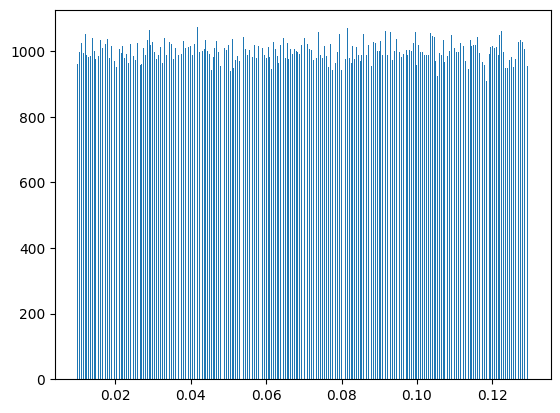

In [10]:
null = plt.hist(TAU, bins=500)

In [ ]:
QU_S = np.array(QU_cmb)
QU_SN = np.array(QU_cmb_noise)
TAU = np.array(TAU)

In [ ]:
Xs_train, Xs_test, ys_train, ys_test = train_test_split(QU_S, TAU, test_size=0.1, random_state=42)
Xsn_train, Xsn_test, ysn_train, ysn_test = train_test_split(QU_SN, TAU, test_size=0.1, random_state=42)

In [ ]:
models = TauNet(nmaps=2)
modelsn = TauNet(nmaps=2)

2023-12-17 23:23:19.953368: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-17 23:23:20.859401: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 78933 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:c1:00.0, compute capability: 8.0


In [ ]:
hists = models.compile_and_fit(Xs_train,ys_train,Xs_test,ys_test)

Epoch 1/45


2023-12-17 23:23:26.627033: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8302
2023-12-17 23:23:28.366089: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


282/282 [==============================] - 8s 5ms/step - loss: 0.0074 - mean_squared_error: 0.0037 - val_loss: 0.0048 - val_mean_squared_error: 0.0029 - lr: 0.0010
Epoch 2/45
282/282 [==============================] - 1s 4ms/step - loss: 0.0023 - mean_squared_error: 0.0029 - val_loss: 0.0022 - val_mean_squared_error: 0.0030 - lr: 0.0010
Epoch 3/45
282/282 [==============================] - 1s 4ms/step - loss: 0.0019 - mean_squared_error: 0.0029 - val_loss: 0.0015 - val_mean_squared_error: 0.0028 - lr: 0.0010
Epoch 4/45
282/282 [==============================] - 1s 4ms/step - loss: 0.0016 - mean_squared_error: 0.0029 - val_loss: 0.0014 - val_mean_squared_error: 0.0028 - lr: 0.0010
Epoch 5/45
282/282 [==============================] - 1s 4ms/step - loss: 0.0013 - mean_squared_error: 0.0029 - val_loss: 0.0013 - val_mean_squared_error: 0.0029 - lr: 0.0010
Epoch 6/45
282/282 [==============================] - 1s 4ms/step - loss: 0.0013 - mean_squared_error: 0.0029 - val_loss: 0.0012 - val_m

In [ ]:
histsn = modelsn.compile_and_fit(Xsn_train,ysn_train,Xsn_test,ysn_test)

Epoch 1/45
282/282 [==============================] - 2s 4ms/step - loss: 0.0091 - mean_squared_error: 0.0029 - val_loss: 0.0054 - val_mean_squared_error: 0.0033 - lr: 0.0010
Epoch 2/45
282/282 [==============================] - 1s 4ms/step - loss: 0.0033 - mean_squared_error: 0.0035 - val_loss: 0.0030 - val_mean_squared_error: 0.0035 - lr: 0.0010
Epoch 3/45
282/282 [==============================] - 1s 4ms/step - loss: 0.0025 - mean_squared_error: 0.0035 - val_loss: 0.0039 - val_mean_squared_error: 0.0037 - lr: 0.0010
Epoch 4/45
282/282 [==============================] - 1s 4ms/step - loss: 0.0022 - mean_squared_error: 0.0035 - val_loss: 0.0023 - val_mean_squared_error: 0.0035 - lr: 0.0010
Epoch 5/45
282/282 [==============================] - 1s 4ms/step - loss: 0.0019 - mean_squared_error: 0.0035 - val_loss: 0.0018 - val_mean_squared_error: 0.0035 - lr: 0.0010
Epoch 6/45
282/282 [==============================] - 1s 4ms/step - loss: 0.0018 - mean_squared_error: 0.0035 - val_loss: 0.0

In [ ]:
predicts = models.predict(Xs_test)
predictsn = modelsn.predict(Xsn_test)

32/32 [==============================] - 0s 1ms/step


In [ ]:
diffs = predicts[:,0] - ys_test.flatten()
diffsn = predictsn[:,0] - ysn_test.flatten()
stds = np.std(diffs)
stdsn = np.std(diffsn)

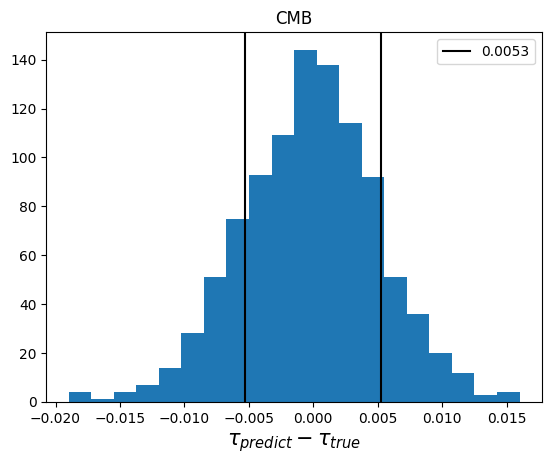

In [ ]:
plt.hist(predicts[:,0] - ys_test.flatten(),bins=20)
plt.xlabel('$\\tau_{predict} - \\tau_{true}$',fontsize=15)
plt.axvline(stds,c='k',label=f'{stds:.4f}')
plt.axvline(-stds,c='k')
plt.title('CMB')
plt.legend()

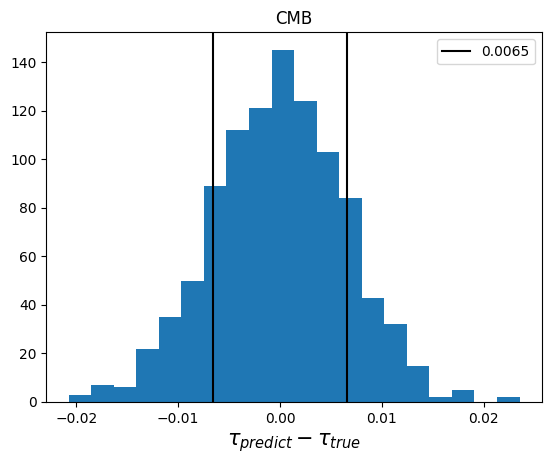

In [ ]:
plt.hist(predictsn[:,0] - ysn_test.flatten(),bins=20)
plt.xlabel('$\\tau_{predict} - \\tau_{true}$',fontsize=15)
plt.axvline(stdsn,c='k',label=f'{stdsn:.4f}')
plt.axvline(-stdsn,c='k')
plt.title('CMB')
plt.legend()

In [ ]:
np.mean(abs(predicts[:,1]))

0.0035355336

In [ ]:
np.mean(abs(predictsn[:,1]))

0.003582887

In [ ]:
predicts[:,1]

array([-2.27279356e-03,  4.12178179e-03, -5.48772514e-03,  2.28646165e-03,
       -1.07614347e-03,  5.35493623e-03,  2.99383653e-04,  5.41582424e-03,
        4.97781113e-03,  4.59540822e-03, -1.72115723e-03,  3.63780372e-03,
        5.49027044e-03,  5.29252272e-03,  4.61735576e-03,  3.27971764e-04,
        4.48456313e-03,  4.49307403e-03,  2.51721824e-03, -7.03290105e-03,
        3.87507631e-03,  5.18880878e-03,  2.96424050e-03, -2.14001862e-03,
        5.01475483e-03,  4.09933040e-04,  5.30137680e-03,  2.62325862e-04,
        3.67853139e-03, -1.18363639e-02,  2.70769722e-03,  2.27247970e-03,
        3.20498366e-03,  3.11121484e-03, -4.40598791e-03,  4.69124643e-04,
        4.16353764e-03, -3.13307717e-03,  2.56540952e-04,  6.11734111e-03,
        2.51335627e-03, -8.83204117e-03,  5.79314772e-04,  4.27709054e-03,
        3.81817250e-03, -2.51534628e-04,  6.43416308e-04,  5.98542951e-03,
        9.12448741e-04, -5.11086546e-04, -2.19359063e-03,  1.63427426e-03,
        5.76383155e-03,  